### Tracing test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

In [2]:
Q = 100
npor = 0.3
k = 10
H = 10
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], tmin=1, tmax=100, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)])
ml.solve()

self.neq  1
solution complete


In [4]:
timtrace = timtraceline(ml, 50, 50, 0, tstart=1, delt=1, nstep=50)

no message


\begin{equation}
Q_r = -T\frac{\partial h}{\partial r} = -T\frac{\text{d} h}{\text{d} u}\frac{\partial u}{\partial r} = -\frac{Q}{2\pi} \frac{1}{r}\exp(-u)
\end{equation}
\begin{equation}
u =  \frac{S r^2}{4T(t-t_0)}
\end{equation}

In [5]:
def vxytheis(t, xy):
    x, y = xy
    r = np.sqrt(x ** 2 + y ** 2)
    u = S * r ** 2 / (4 * T * t)
    Qr = -Q / (2 * np.pi) / r * np.exp(-u)
    vr = Qr / (H * npor)
    vx = vr * x / r
    vy = vr * y / r
    return np.array([vx, vy])

In [6]:
from scipy.integrate import solve_ivp
t = np.arange(1, 52)
path0 = solve_ivp(vxytheis, (1, 51), y0=[50, 50], t_eval=t)

Text(0, 0.5, 'x')

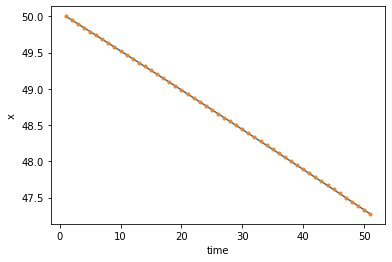

In [7]:
plt.plot(t, path0.y[0])
plt.plot(t, timtrace['trace'][:, 0], '.')
plt.xlabel('time')
plt.ylabel('x')

# Velocities in multi-layer system

In [2]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k, k], z=[2 * H + Hstar, H + Hstar, H, 0], c=[c], Saq=[Ss], tmin=1, tmax=100, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
timtrace = timtraceline(ml, 20, 20, 4, tstart=1, delt=1, nstep=50)

no message


In [10]:
timtrace

{'trace': array([[20.        , 20.        ,  4.        ,  1.        ],
        [19.99870023, 19.99870023,  4.00046088,  2.        ],
        [19.99733911, 19.99733911,  4.00092661,  3.        ],
        [19.99595617, 19.99595617,  4.00139277,  4.        ],
        [19.99456225, 19.99456225,  4.00185903,  5.        ],
        [19.99316177, 19.99316177,  4.00232537,  6.        ],
        [19.99175693, 19.99175693,  4.00279177,  7.        ],
        [19.990349  , 19.990349  ,  4.00325824,  8.        ],
        [19.98893876, 19.98893876,  4.00372478,  9.        ],
        [19.98752675, 19.98752675,  4.0041914 , 10.        ],
        [19.98611332, 19.98611332,  4.00465808, 11.        ],
        [19.98469872, 19.98469872,  4.00512482, 12.        ],
        [19.98328321, 19.98328321,  4.00559164, 13.        ],
        [19.9818669 , 19.9818669 ,  4.00605853, 14.        ],
        [19.98044992, 19.98044992,  4.00652548, 15.        ],
        [19.97903238, 19.97903238,  4.00699251, 16.        ],

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

In [2]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
Ss = 1e-4
S = Ss * H
ml = Model3D(kaq=10, z=[20, 15, 10, 5, 0], tmin=1, tmax=10000)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], layers=1)
ml.solve()

self.neq  1
solution complete


In [4]:
timtrace = timtraceline(ml, 20, 20, 16, tstart=1, delt=5, nstep=40, hstepmax=2)

reached element of type well


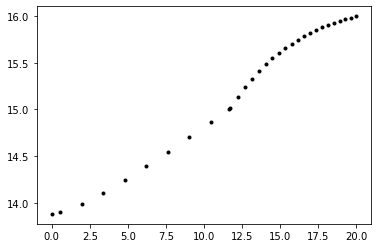

In [5]:
xyzt = timtrace['trace']
plt.plot(xyzt[:, 0], xyzt[:, 2], 'k.')

no message
no message
no message
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


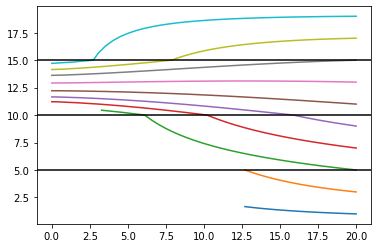

In [6]:
zstart = np.linspace(1, 19, 10)
for zs in zstart:
    timtrace = timtraceline(ml, 20, 20, zs, tstart=1, delt=5, nstep=40, hstepmax=2)
    xyzt = timtrace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [5, 10, 15]:
    plt.axhline(y, color='k')

In [7]:
timtraceline(ml, 20, 20, 1, tstart=1, delt=5, nstep=40, hstepmax=2)

no message


{'trace': array([[ 20.        ,  20.        ,   1.        ,   1.        ],
        [ 19.81965299,  19.81965299,   1.0089601 ,   6.        ],
        [ 19.63477259,  19.63477259,   1.01805163,  11.        ],
        [ 19.4494244 ,  19.4494244 ,   1.02738311,  16.        ],
        [ 19.26387483,  19.26387483,   1.03696944,  21.        ],
        [ 19.07820986,  19.07820986,   1.04682148,  26.        ],
        [ 18.89247459,  18.89247459,   1.05694926,  31.        ],
        [ 18.70669983,  18.70669983,   1.06736285,  36.        ],
        [ 18.52091025,  18.52091025,   1.0780725 ,  41.        ],
        [ 18.33512759,  18.33512759,   1.0890888 ,  46.        ],
        [ 18.14937211,  18.14937211,   1.10042269,  51.        ],
        [ 17.96366335,  17.96366335,   1.11208555,  56.        ],
        [ 17.77802054,  17.77802054,   1.12408917,  61.        ],
        [ 17.59246281,  17.59246281,   1.13644583,  66.        ],
        [ 17.40700939,  17.40700939,   1.14916831,  71.        ],
 

In [10]:
timtraceline(ml, 20, 20, 3, tstart=1, delt=5, nstep=45, hstepmax=2)

no message


{'trace': array([[ 20.        ,  20.        ,   3.        ,   1.        ],
        [ 19.81965299,  19.81965299,   3.02688031,   6.        ],
        [ 19.63477259,  19.63477259,   3.05415489,  11.        ],
        [ 19.4494244 ,  19.4494244 ,   3.08214934,  16.        ],
        [ 19.26387483,  19.26387483,   3.11090833,  21.        ],
        [ 19.07820986,  19.07820986,   3.14046443,  26.        ],
        [ 18.89247459,  18.89247459,   3.17084779,  31.        ],
        [ 18.70669983,  18.70669983,   3.20208855,  36.        ],
        [ 18.52091025,  18.52091025,   3.23421751,  41.        ],
        [ 18.33512759,  18.33512759,   3.2672664 ,  46.        ],
        [ 18.14937211,  18.14937211,   3.30126808,  51.        ],
        [ 17.96366335,  17.96366335,   3.33625664,  56.        ],
        [ 17.77802054,  17.77802054,   3.3722675 ,  61.        ],
        [ 17.59246281,  17.59246281,   3.40933749,  66.        ],
        [ 17.40700939,  17.40700939,   3.44750493,  71.        ],
 

In [12]:
xyzt

array([[ 6.        ,  6.        ,  9.9       ,  1.        ],
       [ 5.9158023 ,  5.9158023 , 15.        ,  1.91048817],
       [ 5.9158023 ,  5.9158023 , 15.        ,  1.91048818],
       [ 4.50158873,  4.50158873, 14.79849933,  4.00500924],
       [ 3.08737517,  3.08737517, 14.61659984,  5.46646347],
       [ 1.67316161,  1.67316161, 14.46191522,  6.39043271],
       [ 0.25894805,  0.25894805, 14.3473007 ,  6.85738351],
       [ 0.        ,  0.        , 14.34075457,  6.87004649]])

In [9]:
w.layers

array([1])

In [10]:
w.discharge(5)

array([[100.0000001]])

In [14]:
np.where(w.layers==1)[0][0]

0

In [16]:
type(w.label)

NoneType

In [18]:
if not w.label:
    print('hello')

hello


In [4]:
ml.elementlist

[Well at (0.0, 0.0)]